以下のプログラムはAGIRobots Blogに書かれた「[Pythonでライフゲーム！　人工生命入門](https://developers.agirobots.com/jp/python-lifegame-nyumon/)」にあるプログラムをGoogle Colabで実行可能にしたものです．説明は上のリンク先を参照してください．
このライフゲームプログラムでは，初期配置をランダムに決めて，その実行をします．

比較的複雑なプログラムを作るには，複数の関数を定義して組み合わせます．
この事例のように，どのような関数を定義して組み合わせればよいかを考えるのは簡単ではありません．

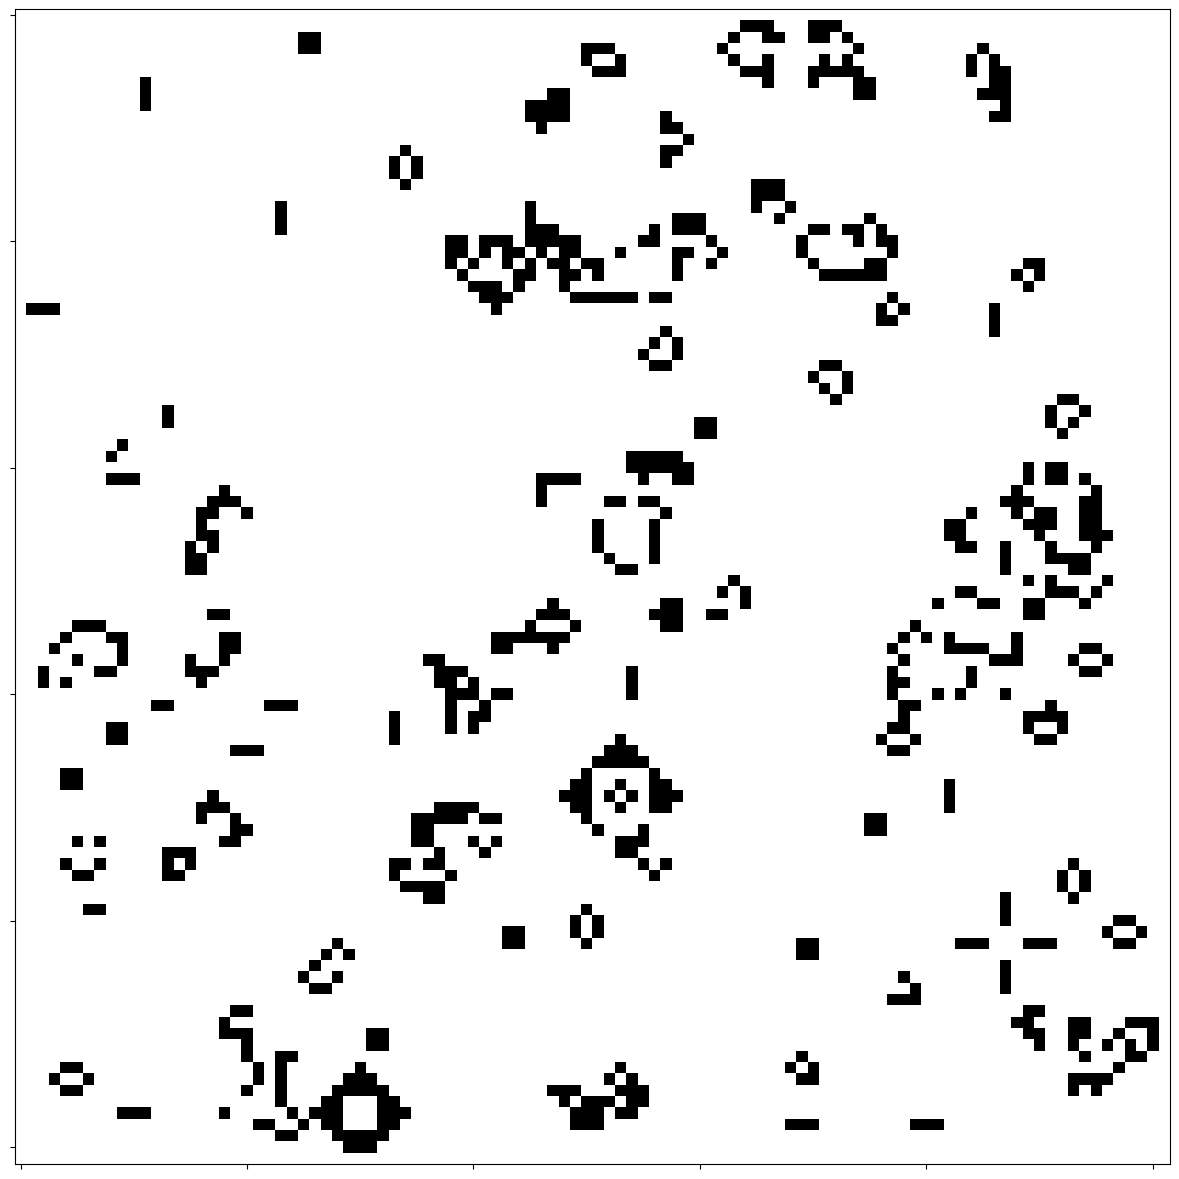

In [8]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation    # アニメーションを作成します
from matplotlib.animation import PillowWriter   # gifファイル書き出しに必要となる場合があります

# 上で説明したことを実行する関数を定義します。
# Nは生命が生存可能なマスの辺の長さです。ゼロパディングを考慮するために必要です。
# そのため、NumPy配列で定義されたcellは(N+2, N+2)の大きさになります。
def f(N, cell):
  cell_new = cell.copy()   # 1ステップ状態遷移後の結果を格納する配列を用意します。
  for i in range(1, cell.shape[0]-1):  # 周囲のゼロパディングを考慮して注目セルのx座標を遷移させます。
    for j in range(1, cell.shape[1]-1):  # 周囲のゼロパディングを考慮して注目セルのy座標を遷移させます。
      if cell[i, j] == 1:
        N_shu = cell[i-1:i+2, j-1:j+2].sum() - 1 # 周囲の１の個数（自身が足されるため1引きます）
        if N_shu==2 or N_shu==3:
          cell_new[i, j] = 1
        else:
          cell_new[i, j] = 0
      else:
        N_shu = cell[i-1:i+2, j-1:j+2].sum()
        if N_shu==3:
          cell_new[i, j] = 1
        else:
          cell_new[i, j] = 0

  return cell_new

#アニメーション生成の前準備
fig = plt.figure(figsize=(15, 15))
#表示される図の目盛りを非表示にします。
plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
ims = []  # アニメーション作成に使用します。
N=100   # この場合、人工生命が存在しうる領域は100x100です。
cell = np.zeros((N+2, N+2), dtype=int)  # cellを定義します。
mat = np.random.randint(0, 2, size=(N, N), dtype=int)  # 0と1の一様分布から初期値をランダムに生成します。
cell[1:-1, 1:-1] = mat   # ランダムに生成した値をcellの生命が存在可能な領域に代入します。

# ここからがメインのライフゲームです！
for _ in range(100):   # 100ステップの状態遷移を実行します。
  cell= f(N, cell)
  # 以下の2行はアニメーション作成の準備です。
  im = plt.imshow(cell, cmap=plt.cm.gray_r, animated=True)
  ims.append([im]) # imを[]で囲って追加しないとアニメーション作成時にエラーが起こります。

#アニメーションの生成をします。
ani = animation.ArtistAnimation(fig, ims,interval=100)
plt.show()
#GIFファイルとして保存します。
# ani.save('output.gif')